In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import nltk

In [2]:
df = pd.read_csv("sentiment140\\training_processed.csv", encoding='ISO-8859-1', header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
col_name = {
    0: 'Target',
    1: 'ID',
    2: 'Timestamp',
    3: 'Query',
    4: 'Username',
    5: 'Tweet'    
}

df = df.rename(columns=col_name)

In [4]:
df['Query'].value_counts()

Query
NO_QUERY    1600000
Name: count, dtype: int64

In [5]:
df.drop('Query', axis=1, inplace=True)

In [6]:
df.head()

,Target,ID,Timestamp,Username,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all...."


In [7]:
df['ID'].nunique()

1598315

In [8]:
df['ID'].value_counts()

ID
1755608533    2
2060924350    2
1563536334    2
1990483204    2
1975441103    2
             ..
1467814119    1
1467814180    1
1467814192    1
1467814438    1
1467812416    1
Name: count, Length: 1598315, dtype: int64

In [10]:
df = df.drop_duplicates(['ID', 'Timestamp', 'Username', 'Tweet'])

In [11]:
df['Target'].value_counts()

Target
0    800000
4    798315
Name: count, dtype: int64

In [12]:
df[df['Target'] == 0]['Tweet'].head(10)

0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
5                        @Kwesidei not the whole crew 
6                                          Need a hug 
7    @LOLTrish hey  long time no see! Yes.. Rains a...
8                 @Tatiana_K nope they didn't have it 
9                            @twittera que me muera ? 
Name: Tweet, dtype: object

In [13]:
df[df['Target'] == 4]['Tweet'].head(10)

800000         I LOVE @Health4UandPets u guys r the best!! 
800001    im meeting up with one of my besties tonight! ...
800002    @DaRealSunisaKim Thanks for the Twitter add, S...
800003    Being sick can be really cheap when it hurts t...
800004      @LovesBrooklyn2 he has that effect on everyone 
800005    @ProductOfFear You can tell him that I just bu...
800006    @r_keith_hill Thans for your response. Ihad al...
800007    @KeepinUpWKris I am so jealous, hope you had a...
800008    @tommcfly ah, congrats mr fletcher for finally...
800009    @e4VoIP I RESPONDED  Stupid cat is helping me ...
Name: Tweet, dtype: object

Based on the few example tweet that we saw, we can conclude that the category 0 are negative feeling tweets and the cateogory 4 is positive feeling tweets

In [14]:
df['Username'].value_counts().head(10).reset_index()

,Username,count
0,lost_dog,549
1,webwoke,345
2,tweetpet,310
3,SallytheShizzle,281
4,VioletsCRUK,279
5,mcraddictal,276
6,tsarnick,248
7,what_bugs_u,246
8,Karen230683,238
9,DarkPiano,236


In [15]:
top_users = df['Username'].value_counts().head(10).reset_index()['Username']

In [16]:
top_users

0           lost_dog
1            webwoke
2           tweetpet
3    SallytheShizzle
4        VioletsCRUK
5        mcraddictal
6           tsarnick
7        what_bugs_u
8        Karen230683
9          DarkPiano
Name: Username, dtype: object

In [17]:
top = df[df['Username'].isin(top_users)].copy()

<Axes: xlabel='count', ylabel='Username'>

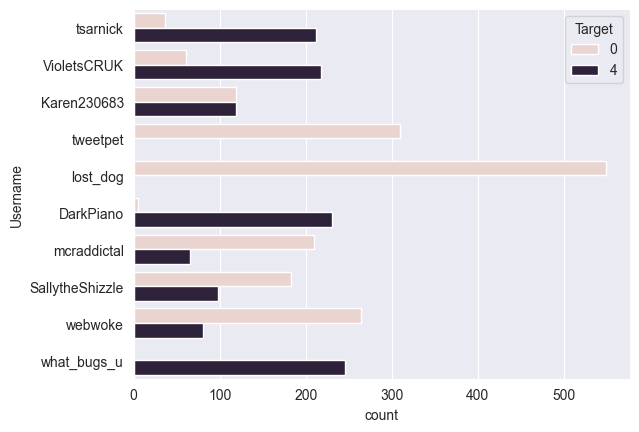

In [18]:
sns.countplot(data=top, y='Username', hue='Target')

In [26]:
df['Tweet'].iloc[2]

'@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds'

In [ ]:
from nltk.corpus import stopwords
stop_w = stopwords.words('english') + ['[', ']', ',', '.', ':', '?', '(', ')']

def remove_stopwords(words: list, stopwords: list) -> list:
    no_stop_words = [w for w in words if not w in stopwords]
    return no_stop_words

def tweet_preprocessing(text: str) -> str:
    word_list = text.split()
    word_list_filtered = [word for word in word_list if (not word.startswith("@") and not word.startswith("http"))]
    word_list_filtered = remove_stopwords(word_list_filtered, stop_w)
    
    
    return " ".join(word_list_filtered)

In [57]:
df['Tweet_preprocessed'] = [tweet_preprocessing(w) for w in df['Tweet']]
df['Tweet_preprocessed'].head()

0    - Awww, that's bummer. You shoulda got David C...
1    upset can't update Facebook texting it... migh...
2    I dived many times ball. Managed save 50% The ...
3                     whole body feels itchy like fire
4    no, behaving all. i'm mad. here? I can't see t...
Name: Tweet_preprocessed, dtype: object